# Regresión con Deep Learning

Predicción de las ventas de la siguiente semana para Walmart.
Base de datos de 45 tiendas tipo A, B. Varían en tamaño

In [1]:
from numpy.random import seed
seed(1)
#from tensorflow import random
#random.set_seed(1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#se invoca el dataset
walmart = pd.read_csv('Walmart.csv')


In [9]:
# Visualiza los primeros registros
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
# Visualiza los nombres de las variables
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [11]:
#le damos formato a la fecha
walmart['Date'] = pd.to_datetime(walmart['Date'], format = '%d-%m-%Y')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## Pre-procesamiento de los datos

In [ ]:
#walmart.drop(['Date'], axis = 1, inplace = True)

In [12]:
walmart['Dia']  = walmart['Date'].dt.day
walmart['Mes']  = walmart['Date'].dt.month
walmart['Anio'] = walmart['Date'].dt.year
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dia,Mes,Anio
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [14]:
# Realizando one-hot
categorical_columns = ['Store', 'Dia', 'Mes', 'Anio']
df = pd.get_dummies(walmart, columns=categorical_columns)
df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,...,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12,Anio_2010,Anio_2011,Anio_2012
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
walmart.iloc[2]

,2
Store,1
Date,2010-02-19 00:00:00
Weekly_Sales,1611968.17
Holiday_Flag,0
Temperature,39.93
Fuel_Price,2.514
CPI,211.289143
Unemployment,8.106
Dia,19
Mes,2


In [16]:
#aliminamos date porq ya separamos por dia mes y año
walmart.drop(['Date'], axis = 1, inplace = True)

In [17]:
# Visualiza los nombres de las variables
walmart.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Dia', 'Mes', 'Anio'],
      dtype='object')

In [18]:
#estandarizando
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(walmart)
walmartstd = scaler.transform(walmart)
walmartstd

array([[-1.69397911,  1.05741972, -0.27420425, ..., -1.21966879,
        -1.37352517, -1.21089907],
       [-1.69397911,  1.05434796,  3.64691651, ..., -0.42013476,
        -1.37352517, -1.21089907],
       [-1.69397911,  1.00120591, -0.27420425, ...,  0.37939926,
        -1.37352517, -1.21089907],
       ...,
       [ 1.69397911, -0.55376202, -0.27420425, ..., -0.42013476,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.58271501, -0.27420425, ...,  0.37939926,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.50801326, -0.27420425, ...,  1.17893329,
         1.09709243,  1.29864538]])

In [20]:
walmartstd.shape

(6435, 10)

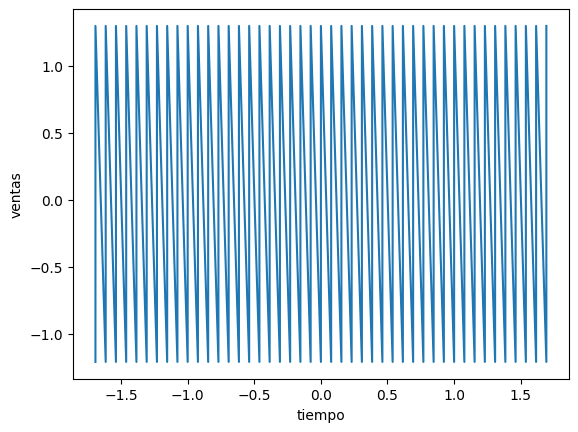

In [21]:
# Grafica de las ventas
plt.plot(walmartstd[:,0], walmartstd[:,-1])
plt.xlabel('tiempo')
plt.ylabel('ventas')
plt.show()

Creación de conjuntos de entrenamiento y test

In [22]:
x_train, x_test, y_train, y_test = train_test_split(walmartstd[:, :-1],
                                                    walmartstd[:, -1],
                                                    test_size = 0.2,
                                                    random_state = 1)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5148, 9)
(5148,)
(1287, 9)
(1287,)


Generación del modelo

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers, backend, callbacks
from sklearn.metrics import r2_score

In [25]:
backend.clear_session()

# Modelo
modelo1 = Sequential()
modelo1.add(Dense(15, input_dim=x_train.shape[1], activation='relu'))
modelo1.add(Dropout(0.2))  # Especificar la tasa de Dropout
modelo1.add(Dense(15, activation='relu'))  # Añadir la activación 'relu'
modelo1.add(Dropout(0.2))  # Especificar la tasa de Dropout
modelo1.add(Dense(1, activation='linear'))

modelo1.summary()
# Fin del modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406 (1.59 KB)

 Trainable params: 406 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Define el optimizador Adam
Adam = optimizers.Adam(learning_rate = 0.001)

#Compila el modelo
modelo1.compile(loss = 'mean_squared_error', optimizer = Adam, metrics = ['mse'])

#Checkpointer para guardar el mejor modelo
checkpointer = callbacks.ModelCheckpoint('walmart1.keras', monitor = 'val_mse',
                                         save_best_only = True,
                                         mode = 'min')

In [27]:
 #Entrena el modelo
M = modelo1.fit(x_train, y_train,
                validation_data=(x_test, y_test),
                epochs = 250, batch_size = 11,
                verbose = False, callbacks = [checkpointer])

In [28]:
modelo1.load_weights('walmart1.keras')


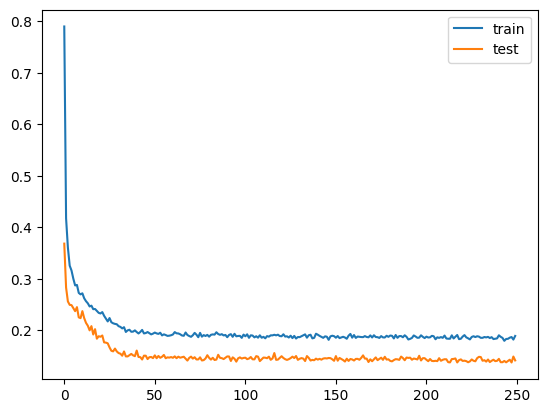

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


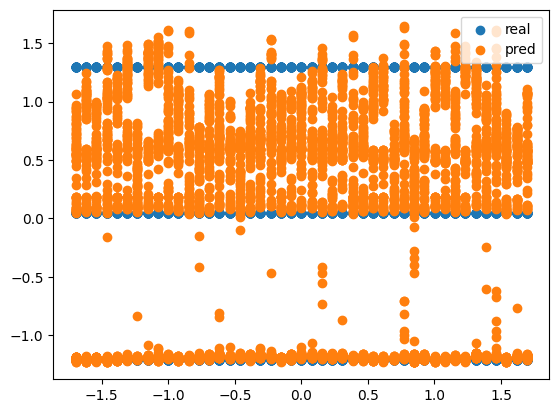

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
r2:  0.862554622009031
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1381 - mse: 0.1381
error (mse):  [0.1367509365081787, 0.1367509365081787]
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


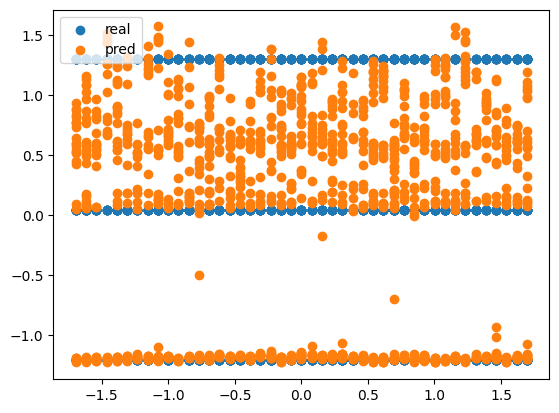

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
r2:  0.8649580100915083
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1385 - mse: 0.1385
error (mse):  [0.13776330649852753, 0.13776330649852753]


In [29]:
# Evaluación del modelo
# Grafica del error
plt.plot(M.history['loss'], label='train')
plt.plot(M.history['val_loss'], label='test')
plt.legend(loc='best')
plt.show()

# Evaluación en entrenamiento
plt.scatter(x_train[:,0], y_train, label='real')
plt.scatter(x_train[:,0], modelo1.predict(x_train), label='pred')
plt.legend(loc = 'best')
plt.show()
print('r2: ', r2_score(y_train, modelo1.predict(x_train)))
print('error (mse): ', modelo1.evaluate(x_train, y_train))

# Evaluación en validación
plt.scatter(x_test[:,0], y_test, label = 'real')
plt.scatter(x_test[:,0], modelo1.predict(x_test), label = 'pred')
plt.legend(loc = 'best')
plt.show()
print('r2: ',r2_score(y_test, modelo1.predict(x_test)))
print('error (mse): ', modelo1.evaluate(x_test, y_test))